In [1]:
from qiskit import *
from qiskit.providers.aer import noise
from qiskit.tools.visualization import plot_histogram
from qiskit.providers.aer.noise import NoiseModel

In [ ]:
noiseC = noise.NoiseModel()
noiseC.add_all_qubit_quantum_error(noise.pauli_error([('X', 0.01), ('Y', 0.01), ('Z', 0.01), ('I', 0.97)]), ['id'])
basis_gates = noiseC.basis_gates

In [35]:
crt = QuantumCircuit(25, 13)
crt.reset(range(25))

In [ ]:
def init(crt, a, b):
    

In [34]:
def syndrome(crt):
    crt.h(list(map((lambda x: x * 2 + 1), range(12))))
    for i in [0, 2, 4, 10, 12, 14, 20, 22, 24]:
        if i - 1 >= 0 and i % 5 != 0:
            crt.cnot(i-1, i)
        if i - 5 >= 0:
            crt.cnot(i-5, i)
        if i + 1 < 25 and i % 5 !=4:
            crt.cnot(i+1, i)
        if i + 5 < 25:
            crt.cnot(i+5, i)
    crt.barrier()
    crt.h(list(map((lambda x: x * 2 + 1), range(12))))
    
    for i in [6, 8, 16, 18]:
        crt.cnot(i-1, i)
        crt.cnot(i-5, i)
        crt.cnot(i+1, i)
        crt.cnot(i+5, i)
    crt.barrier()
    
    crt.measure([0, 2, 4, 10, 12, 14, 20, 22, 24], [0, 1, 2, 5, 6, 7, 10, 11, 12])
    crt.measure([6, 8, 16, 18], [3, 4, 8, 9])

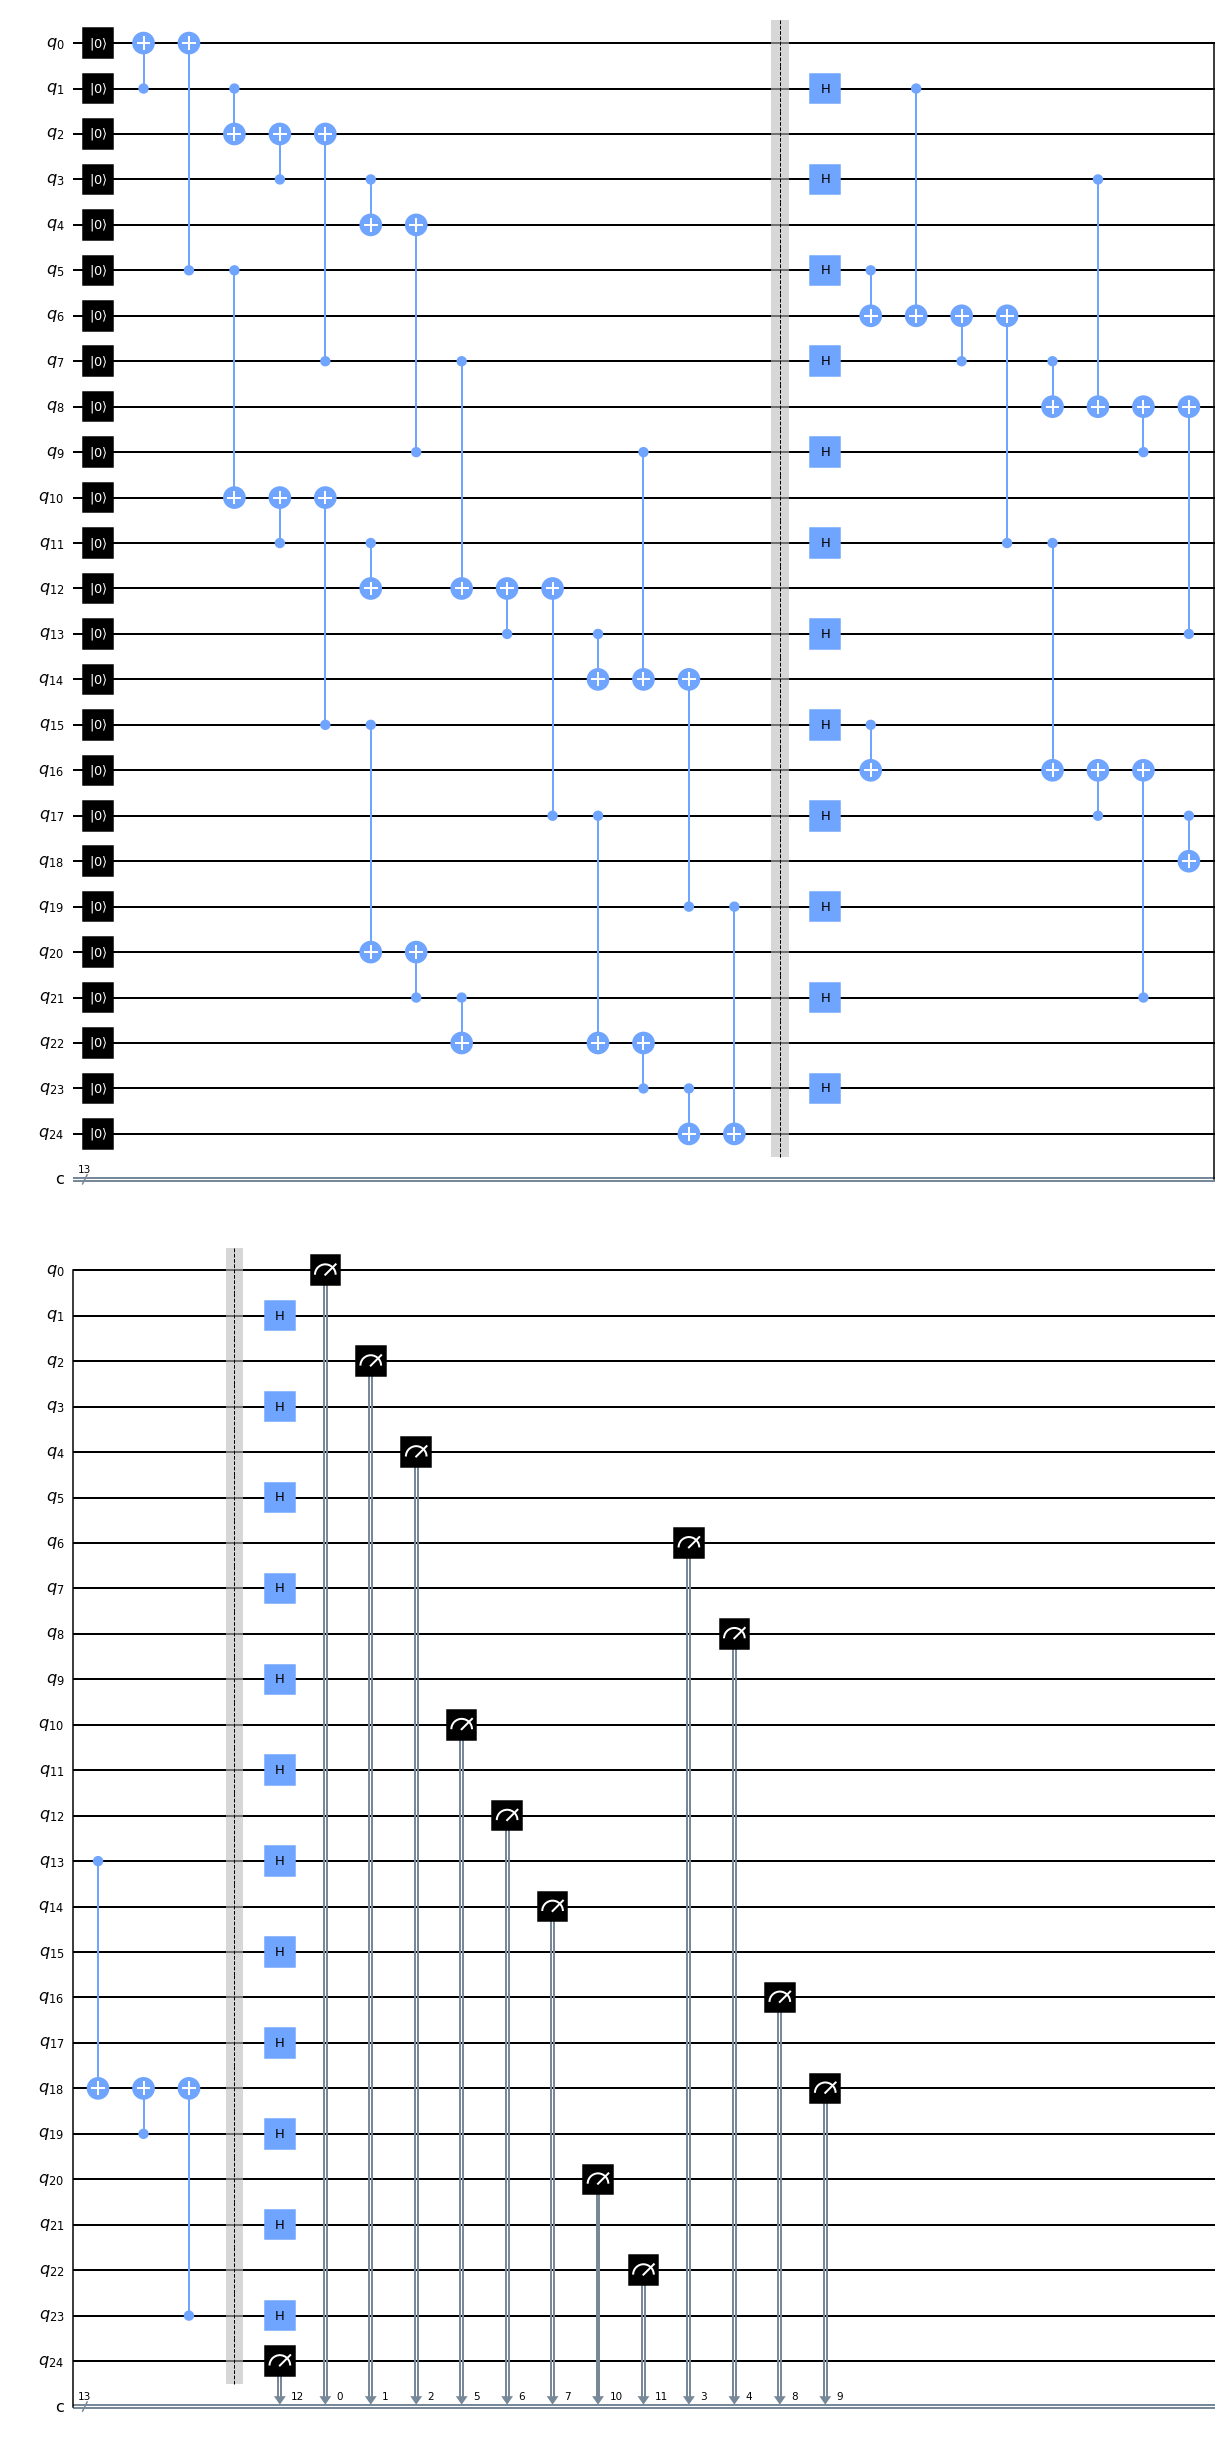

In [36]:
syndrome(crt)
crt.draw(output='mpl')

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]
